In [1]:
library(tidyverse)
library(glue)
library(dplyr)

install.packages("showtext")
install.packages("extrafont")
library(extrafont)
font_import()


theme_rangeframe <- function(size = 0.3) {
    theme(
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )
}

scale_axis_rangeframe <- function() {
    guides(x = "axis_truncated", y = "axis_truncated")
}

rotate_x_text <- function(angle=45) {
    theme(
        axis.text.x = element_text(angle = angle, hjust = 1)
    )
}

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}

no_legend <- function() {
    theme(
        legend.position = "none"
    )
}

no_margin <- function() {
    theme(
        plot.margin = margin(0, 0, 0, 0, unit = "lines")
    )
}

no_label <- function() {
    theme(
        axis.title = element_blank()
    )
}

no_text <- function() {
    theme(
        axis.title = element_blank(),
        axis.text = element_blank(),
        axis.ticks = element_blank()
    )
}

no_x_text <- function() {
    theme(
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank()
    )
}

no_y_text <- function() {
    theme(
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank()
    )
}


custom_theme <- function(size = 0.3){
    theme_minimal() +
    theme(
        text = element_text(family='Helvetica'),
        axis.line = element_line(colour = "black", lineend = "round", size = size),
        axis.ticks = element_line(linewidth = size),
        panel.border = element_blank()
    )

}
theme_set(custom_theme())

article_text <- function() {
    theme(
        text = element_text(size = 5, family = "Helvetica"),
        title = element_text(size = 6),
        axis.text.x = element_text(size = 5),
        axis.text.y = element_text(size = 5)
    )
}


Warning message:
“package ‘tidyverse’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
Warning message:
“package ‘lubridate’ was built under R version 4.2.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package 

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Bold.ttf
 : DejaVuSans-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-BoldOblique.ttf
 : DejaVuSans-BoldOblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-ExtraLight.ttf
 : DejaVuSans-ExtraLight already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans-Oblique.ttf
 : DejaVuSans-Oblique already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSans.ttf
 : DejaVuSans already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-Bold.ttf
 : DejaVuSansCondensed-Bold already registered in fonts database. Skipping.

/usr/share/fonts/dejavu-sans-fonts/DejaVuSansCondensed-BoldOblique.ttf
 : DejaVuSansCondensed-BoldOblique already registered in fonts d

In [2]:
color_dict = c(
    "CellFlow"= "#B12F8C",
    "Mean model 1"= "#566573",
    "Mean model 2"= "#8F97A8",
    "Identity"="#BDBDBD",
    "min"="#475a69")

In [3]:
output_dir <- glue("/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/benchmark/single_condition")
dir.create(output_dir)

Warning message in dir.create(output_dir):
“'/lustre/groups/ml01/workspace/ot_perturbation/figures/zebrafish/benchmark/single_condition' already exists”


In [30]:
results <- read_csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/results/allocation/same_tp_cf_diff_e_distance_aggregated.csv")

New names:
• `` -> `...1`
Rows: 6603 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): condition, variable, cell_type, gene_target, exp_stage, perturbatio...
dbl (4): ...1, value, perturbation_effect, timepoint

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [31]:
results$timepoint <- factor(results$timepoint,
                                levels = c(72,48,36,24,18),
                                labels = c(72,48,36,24,18))  # Correct factorization
results$exp_stage <- factor(results$exp_stage, levels=c("latest", "middle", "earliest"), labels=c("lat", "mid", "ear"))

Warning message:
“Removed 2556 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


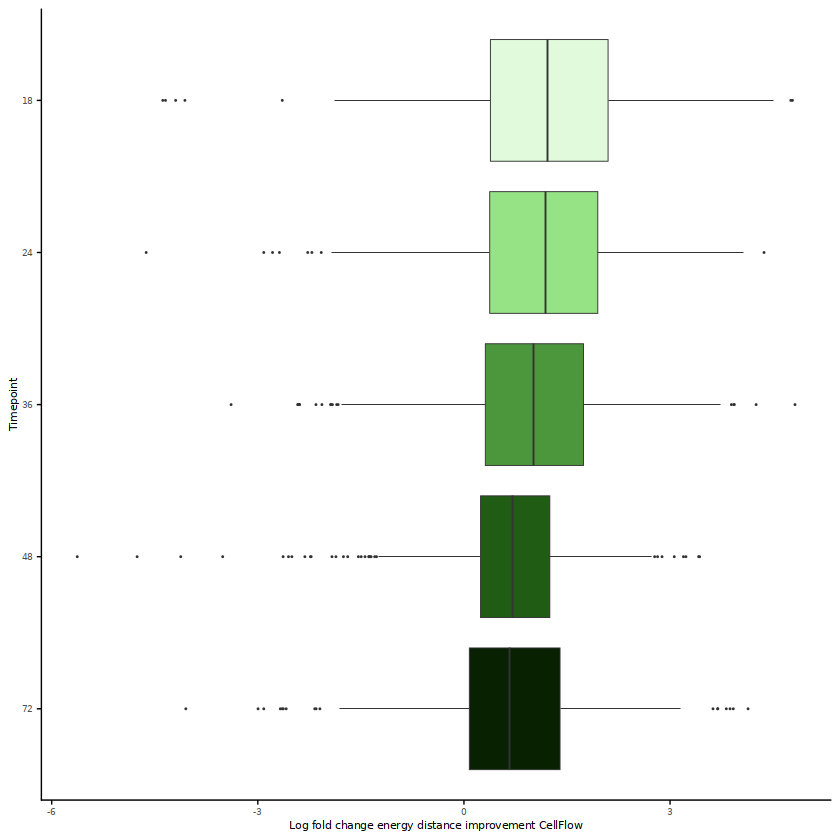

In [32]:
time_palette = c("18"= "#e1fadc", "24"= "#95e384", "36"= "#4c963b", "48"="#215c14", "72"="#072101")
p <- ggplot(results, aes(x=timepoint, y=value, fill=timepoint)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=time_palette) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Timepoint",
    y="Log fold change energy distance improvement CellFlow",
    fill="Timepoint"
  )+
  coord_flip()
p

In [33]:
ggsave(file.path(output_dir, "e_distance_improvement_per_timepoint.pdf"), plot = p, device = "pdf", width = 4.0, height = 3.0, unit="cm")

Warning message:
“Removed 2556 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


Warning message:
“Removed 2556 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


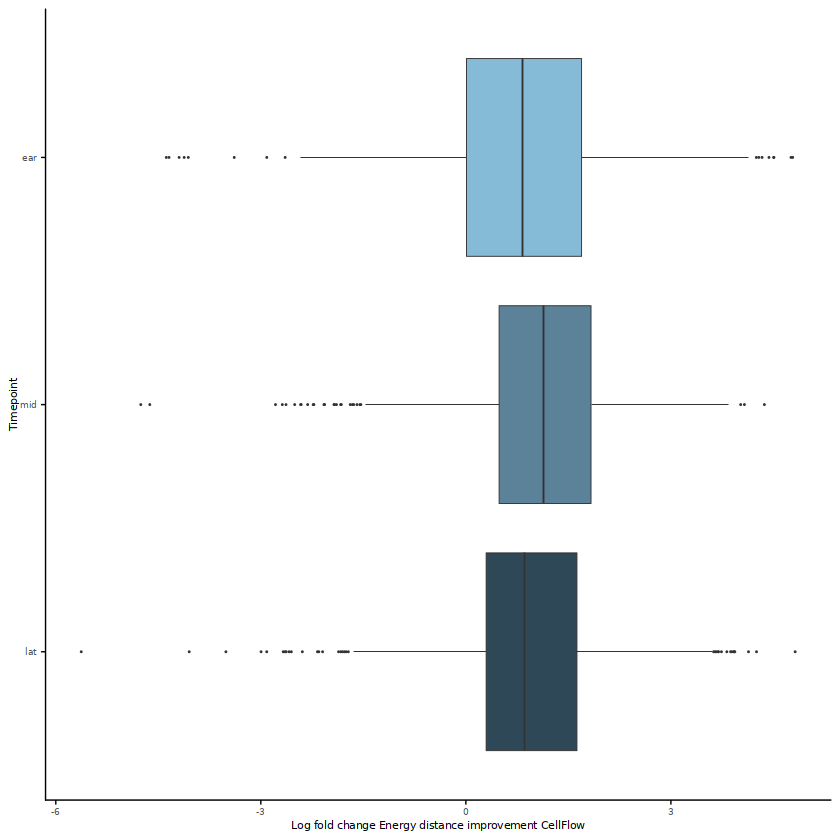

In [34]:
stage_palette = c("ear"= "#86BBD8", "mid"= "#5B8298", "lat"= "#2F4858")
p <- ggplot(results, aes(x=exp_stage, y=value, fill=exp_stage)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=stage_palette) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Timepoint",
    y="Log fold change Energy distance improvement CellFlow",
    fill="Timepoint"
  )+
  coord_flip()
p

In [35]:
ggsave(file.path(output_dir, "e_distance_improvement_per_stage.pdf"), plot = p, device = "pdf", width = 4.0, height = 2.0, unit="cm")

Warning message:
“Removed 2556 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


In [26]:
gts_ordered <- read.csv("/lustre/groups/ml01/workspace/ot_perturbation/data/zebrafish_new/gene_targets_ordered2.csv")


In [27]:
results$gene_target <- factor(results$gene_target, levels = rev(gts_ordered$gene_target[!duplicated(gts_ordered$gene_target)]))

Warning message:
“Removed 2556 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


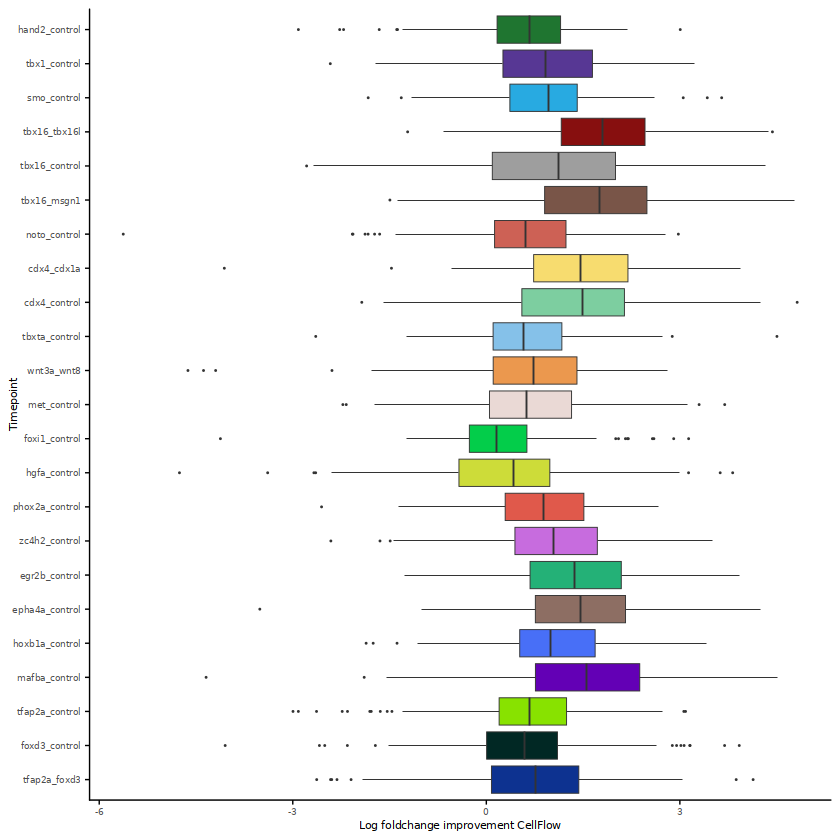

In [28]:
color_dict_targets <- list(
  hand2_control = "#1F7530",
  tbx1_control = "#573794",
  smo_control = "#28AAE1",
  tbx16_tbx16l = "#870f0f",
  tbx16_control = "#9e9e9e",
  tbx16_msgn1 = "#795548",
  noto_control = "#CD6155",
  cdx4_cdx1a = "#F7DC6F",
  cdx4_control = "#7DCEA0",
  tbxta_control = "#85C1E9",
  wnt3a_wnt8 = "#EB984E",
  met_control = "#ead9d5",
  foxi1_control = "#03cd4A",
  hgfa_control = "#CDDC39",
  phox2a_control = "#e0594b",
  zc4h2_control = "#c76cde",
  egr2b_control = "#24B177",
  epha4a_control = "#8D6E63",
  hoxb1a_control = "#486ff7",
  mafba_control = "#6300b5",
  tfap2a_control = "#88e200",
  foxd3_control = "#012824",
  tfap2a_foxd3 = "#0d3290"
)


p <- ggplot(results, aes(x=gene_target, y=value, fill=gene_target)) +
  geom_boxplot(size=0.2,  width=0.8, outlier.size=0.2, outlier.shape=16) +
  scale_fill_manual(values=color_dict_targets) +  # Removed labels argument
  custom_theme() +
article_text() +
no_legend() +
theme(
    panel.grid.major=element_blank(), 
    panel.grid.minor=element_blank()
)  +
  labs(
    x="Timepoint",
    y="Log foldchange improvement CellFlow",
  )+
  coord_flip()
p

In [29]:
ggsave(file.path(output_dir, "e_distance_improvement_per_gene_target.pdf"), plot = p, device = "pdf", width = 5.5, height = 4.5, unit="cm")

Warning message:
“Removed 2556 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
